## Introduction:

In this notebook we will use an auto imports dataset from the UCI Machine Learning database. The goal is to predict car prices using the best features. The algorithm we'll be using is K nearest neighbors. KNN is a simple supervised learning algorithm that stores all available cases and predicts the numerical target based on a similarity measure (e.g., using euclidean distance). This makes KNN non-parametric and "lazy", e.g. it does not make any assumptions about the data, making it easy to implement, versatile, and accurate. KNN has been used in statistical learning and pattern recognition since the 1970’s and still gets used today for classifications and regressions.
 				
But before we use the algorithm we need to clean up the dataset by removing unwanted or missing values; normalize the features using min-max rescaling; and then iteratively building models to find the best model.

Here is a link to the data dictionary: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names


## Workflow:

- Cleaning
- Filtering for only numeric values
- Removing unwanted values
- Deal with missing values
- Feature scaling
- Building univariate models
- Hyperparameter tuning
- Multivariate models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data")
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
3              204 non-null int64
?              204 non-null object
alfa-romero    204 non-null object
gas            204 non-null object
std            204 non-null object
two            204 non-null object
convertible    204 non-null object
rwd            204 non-null object
front          204 non-null object
88.60          204 non-null float64
168.80         204 non-null float64
64.10          204 non-null float64
48.80          204 non-null float64
2548           204 non-null int64
dohc           204 non-null object
four           204 non-null object
130            204 non-null int64
mpfi           204 non-null object
3.47           204 non-null object
2.68           204 non-null object
9.00           204 non-null float64
111            204 non-null object
5000           204 non-null object
21             204 non-null int64
27             204 non-null int64
13495          204 n

## Cleaning

Looks like the dataset did not come with column names, so well add them manually.

In [4]:
# the dataset did not come with column names so well add them manually
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df.columns = cols

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    204 non-null object
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         204 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 204 non-null object
stroke               204 non-null object
compression-rate     204 non-null float64
horsepower           204 non-nul

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## Filtering for only numeric columns

We can't input qualitative (e.g. fuel-type or body-style) variables into our machine learning algorithm - unless we encode them. But for the sake of simplicity, we'll exlude all nominal, or categorical variables, using only the numeric types.

In [7]:
# finding integers
ints = df.dtypes == 'int64'
ints.index

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [8]:
# finding float
floats = df.dtypes == 'float64'
floats.index

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [9]:
# choosing these numeric variables
num_cols = ['normalized-losses', 
                          'wheel-base', 
                          'length', 
                          'width', 
                          'height', 
                          'curb-weight', 
                          'bore', 
                          'stroke', 
                          'compression-rate', 
                          'horsepower', 
                          'peak-rpm', 
                          'city-mpg', 
                          'highway-mpg', 
                          'price']
df_num = df[num_cols]
df_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250


In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
normalized-losses    204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
bore                 204 non-null object
stroke               204 non-null object
compression-rate     204 non-null float64
horsepower           204 non-null object
peak-rpm             204 non-null object
city-mpg             204 non-null int64
highway-mpg          204 non-null int64
price                204 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.4+ KB


## Removing unwanted values

After adding column names and selecting only the numeric variables, we now need to deal with unwanted values. The K-Nearest Neighbors algorithm uses the (euclidean) distance formula (yes, the one from highschool) to determine the nearest neighbors. You cant use non-numerical values for the algorithm, so we'll need to address some problematic variables. In this dataset missing values have been encoded with a '?' string, so we'll replace it with NaN. Doing so will allow us to find out how many missing values there are.

In [11]:
# replacing with NaN
df_num = df_num.replace("?", np.nan)

In [12]:
df_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250


In [13]:
# convert to floats
df_num = df_num.astype('float')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null float64
bore                 200 non-null float64
stroke               200 non-null float64
compression-rate     204 non-null float64
horsepower           202 non-null float64
peak-rpm             202 non-null float64
city-mpg             204 non-null float64
highway-mpg          204 non-null float64
price                200 non-null float64
dtypes: float64(14)
memory usage: 22.4 KB


## Find missing values

We now need to find and address missing values. We will use the mean of the variable to fill in the missing values - using the fillna() method.

In [14]:
# relative frequency of missing values
df_num.isnull().sum()/len(df_num)

normalized-losses    0.196078
wheel-base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb-weight          0.000000
bore                 0.019608
stroke               0.019608
compression-rate     0.000000
horsepower           0.009804
peak-rpm             0.009804
city-mpg             0.000000
highway-mpg          0.000000
price                0.019608
dtype: float64

In [15]:
df_num["normalized-losses"].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [16]:
df_num["price"].isnull().sum()

4

In [17]:
# because price is the target we want to remove rows with missing prices.
df_num = df_num.dropna(subset=["price"])

In [18]:
df_num.isnull().sum()

normalized-losses    36
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

## Replacing missing values

In [19]:
# replacing missing values with means
df_num = df_num.fillna(df_num.mean())

In [20]:
df_num.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
df_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,122.0,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


In [22]:
df_num.shape

(200, 14)

## Feature scaling

Some of the feature values are small and some are large. This can confuse the algorithm so we'll need to to normalize them using min-max rescaling.

In [23]:
price_col = df_num['price']
# min-max normalization will create values between 0 and 1
numeric_cars = (df_num - df_num.min())/(df_num.max() - df_num.min())
numeric_cars['price'] = price_col

In [24]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0


## Univariate models


Now that the features are ready, we can start to build some models. Using the KNeighborsRegressor, we will predict the price of the cars using one variable. Later, we will use several of the features. To scale some of my work I'll build a function to split the data into training and testing data. Then it will train the models on the training set and predicting using the testing set - that way we reduce the bias and increase the variance of the model. The function will then return the root mean squared error of the model. 

In [25]:
# import libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [26]:
# build function
def knn_train_test(features, target_col, df):
    """
    Arguments:
    features = features 
    target_col = target variable
    df = dataframe
    
    This function will shuffle the index then reindex the df. It will
    then split the df into training and testing data. Then
    the model will be trained, used to predict values, and finally
    evaluated using RMSE.
    
    """
    # randomize sets
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    # assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    # training
    knn = KNeighborsRegressor()
    knn.fit(train_df[[features]], train_df[[target_col]])
    
    # test
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [27]:
# setting up features used to train model
train_cols = list(numeric_cars.columns[0:13])
target_col = ['price']

train_cols, target_col

(['normalized-losses',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'bore',
  'stroke',
  'compression-rate',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg'],
 ['price'])

In [28]:
# using function for every feature and evaluating model
scores = {}
for col in train_cols:
    score = knn_train_test(col, 'price', numeric_cars)
    scores[col] = score

In [29]:
scores_series = pd.Series(scores)
scores_series.sort_values()

curb-weight          3439.491639
highway-mpg          3737.162047
width                3773.135499
city-mpg             3813.193148
horsepower           4456.175620
length               5150.449177
wheel-base           5443.857347
bore                 6206.924562
peak-rpm             6458.378473
compression-rate     7193.588599
height               7380.628859
stroke               8184.186086
normalized-losses    8291.523386
dtype: float64

## Findings:

curb-weight has the lowest error, but it's still not great. Let's now vary the hyperparameters of the model k - the amount of neighbors. This may reduce the error and will help us find the optimal model. 

## Hyperparameter tuning

We'll vary the hyperparameter to 1,3,5,7,9 neighbors.

In [30]:
def knn_train_test_k_fold(features, target_col, df, k_values):
    """
    Arguments:
    features = features 
    target_col = target variable
    df = dataframe
    k_values = list of k-values
    
    This function will shuffle the index then reindex the df. It will
    then split the df into training and testing data. Then
    the model will be trained, varying the k-values; predict values using the test set,
    and finally evaluated using RMSE.
    
    """
    # randomize sets
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    # assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    # training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[features]], train_df[[target_col]])
        
        # test
        predictions = knn.predict(test_df[[features]])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

k = [1,3,5,7,9]
diffk_scores = {}
for col in train_cols:
    score = knn_train_test_k_fold(col, 'price', numeric_cars, k)
    diffk_scores[col] = score
diffk_scores

{'normalized-losses': {1: 7326.341301768571,
  3: 6986.552764895337,
  5: 8291.523385820003,
  7: 7708.952227449723,
  9: 7942.7827438607965},
 'wheel-base': {1: 4616.855696250425,
  3: 5242.4142516168595,
  5: 5443.857347028851,
  7: 5509.9977571942545,
  9: 5435.529878198641},
 'length': {1: 6487.918747179253,
  3: 6134.085873035833,
  5: 5150.4491768776825,
  7: 4982.967035383064,
  9: 4931.887957197089},
 'width': {1: 5713.616311059048,
  3: 4175.369845095562,
  5: 3773.135498600601,
  7: 3486.0353809367534,
  9: 3508.8770012640794},
 'height': {1: 10910.35914761746,
  3: 7805.349593138741,
  5: 7380.628859304605,
  7: 7272.536203121596,
  9: 7121.205659190993},
 'curb-weight': {1: 4390.877922466076,
  3: 3668.3589437240184,
  5: 3439.4916393560256,
  7: 3174.0695108639184,
  9: 3373.692477825783},
 'bore': {1: 5926.514010782393,
  3: 5927.911351770069,
  5: 6206.9245622933095,
  7: 6239.1231894606235,
  9: 6407.868283419558},
 'stroke': {1: 6674.97957524965,
  3: 6907.209119141793

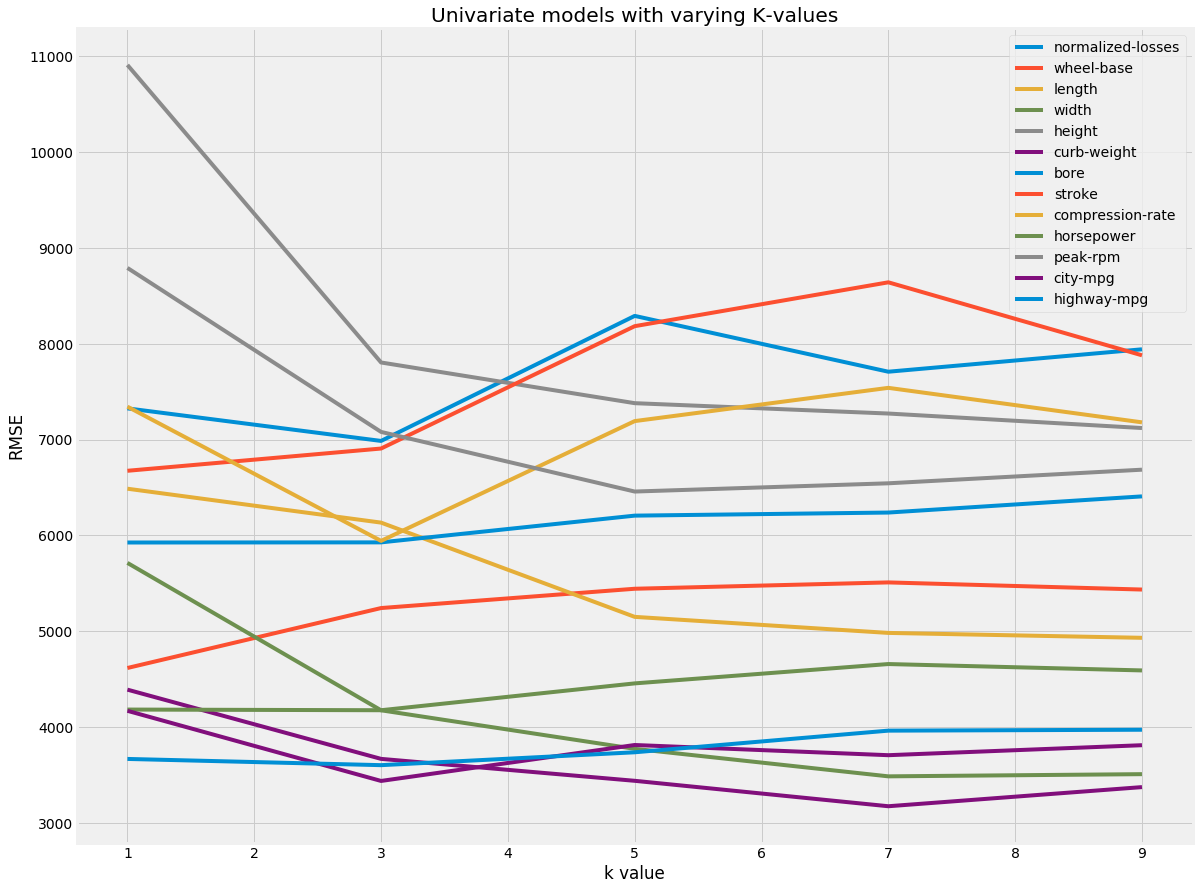

In [31]:
# visualizing 
plt.figure(figsize=(20,15))
plt.style.use("fivethirtyeight")
for k, v in diffk_scores.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.title("Univariate models with varying K-values")    
plt.legend()
plt.show()

Although its a bit hard to read, we can see that curb-weight has the lowest RMSE at about n_neighbors=7. Other noteables are city-mpg at k=3.

Let's take the average of the RMSE across different k's.

In [32]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in diffk_scores.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

curb-weight          3609.298099
city-mpg             3787.802725
highway-mpg          3788.622765
width                4131.406807
horsepower           4412.960576
wheel-base           5249.730986
length               5537.461758
bore                 6141.668280
compression-rate     7040.440142
peak-rpm             7112.435583
normalized-losses    7651.230485
stroke               7657.690117
height               8098.015892
dtype: float64

In [33]:
best_features = list(series_avg_rmse.sort_values().index)
best_features

['curb-weight',
 'city-mpg',
 'highway-mpg',
 'width',
 'horsepower',
 'wheel-base',
 'length',
 'bore',
 'compression-rate',
 'peak-rpm',
 'normalized-losses',
 'stroke',
 'height']

## Findings:

curb-weight, city-mpg, highway-mpg have the top 3 lowest error values. Lets now reduce the amount of features to only the ones with lowest amount of error. In order to find the best features we will test different models:

- two features
- three features
- four features
- five features
- six features

## Multivariate models

In [34]:
def knn_train_test2(features, target_col, df):
    """
    Arguments:
    features = features 
    target_col = target variable
    df = dataframe
    
    This function will shuffle the index then reindex the df. It will
    then split the df into training and testing data. Then
    the model will be trained, make predictions on the test set,
    and finally evaluated using RMSE.
    
    """
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    # assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    # training
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[features], train_df[[target_col]])
    # test
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse


# testing models using 2,3,4,5,6 best features
best_features_rmses  = {}

two_best_features = best_features[:2]
best_features_rmses["two_best_features"] = knn_train_test2(two_best_features, 'price', numeric_cars)

three_best_features = best_features[:3]
best_features_rmses["three_best_features"] = knn_train_test2(three_best_features, 'price', numeric_cars)

four_best_features = best_features[:4]
best_features_rmses["four_best_features"] = knn_train_test2(four_best_features, 'price', numeric_cars)

five_best_features = best_features[:5]
best_features_rmses["five_best_features"] = knn_train_test2(five_best_features, 'price', numeric_cars)

six_best_features = best_features[:6]
best_features_rmses["six_best_features"] = knn_train_test2(six_best_features, 'price', numeric_cars)

In [35]:
best_features_rmses

{'two_best_features': 3513.357329506921,
 'three_best_features': 3642.474889028063,
 'four_best_features': 3445.362153794576,
 'five_best_features': 2946.172765809907,
 'six_best_features': 3515.6636702619894}

In [36]:
best_features[:5]

['curb-weight', 'city-mpg', 'highway-mpg', 'width', 'horsepower']

## Findings:

Five_best_features gave us the lowest error. Those features were:

- curb-weight 
- city-mpg
- highway-mpg
- width 
- horsepower

The three best models were:

- five_best_features
- four_best_features
- two_best_features

For the top 3 models in the last step, we will now vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values to find the optimal k values for each model.


In [37]:
def knn_train_test_k_fold2(features, target_col, df, k_values):
    """
    Arguments:
    features = features 
    target_col = target variable
    df = dataframe
    k_values = list of k-values
    
    This function will shuffle the index then reindex the df. It will
    then split the df into training and testing data. Then
    the model will be trained, varying the k-values; predict values using the test set,
    and finally evaluated using RMSE.
    
    """
    # randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    # assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    
    for k in k_values:
        # train
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[features], train_df[[target_col]])
        # test
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse


In [38]:
diffk_best_features_rmse = {}

k = list(range(1,26))


diffk_best_features_rmse["five_best_features"] = knn_train_test_k_fold2(five_best_features, 'price', numeric_cars, k)


diffk_best_features_rmse["four_best_features"] = knn_train_test_k_fold2(four_best_features, 'price', numeric_cars, k)


diffk_best_features_rmse["two_best_features"] = knn_train_test_k_fold2(two_best_features, 'price', numeric_cars, k)

diffk_best_features_rmse

{'five_best_features': {1: 2901.6607141428512,
  2: 2413.273967559423,
  3: 2770.738208492459,
  4: 2886.9150999596436,
  5: 2946.172765809907,
  6: 3063.0654552805977,
  7: 3222.5310582566262,
  8: 3420.836512006237,
  9: 3597.9064910748475,
  10: 3736.966093183078,
  11: 3867.5344348021217,
  12: 3952.550485410936,
  13: 4032.473212646311,
  14: 4108.556127970467,
  15: 4171.382971554851,
  16: 4288.7833245207785,
  17: 4343.953782137821,
  18: 4408.8189651223165,
  19: 4476.915636435622,
  20: 4505.57353474838,
  21: 4527.847248568781,
  22: 4574.307350215498,
  23: 4615.135994451072,
  24: 4654.041401333884,
  25: 4708.044668357343},
 'four_best_features': {1: 3695.771559498774,
  2: 3514.7280399769197,
  3: 3567.6295594320513,
  4: 3526.5636135797977,
  5: 3445.362153794576,
  6: 3443.9017858866605,
  7: 3409.55325480435,
  8: 3638.4253712328978,
  9: 3710.2710966307877,
  10: 3830.1402396126437,
  11: 3942.8530716091263,
  12: 4010.576415718748,
  13: 4142.606256006922,
  14: 423

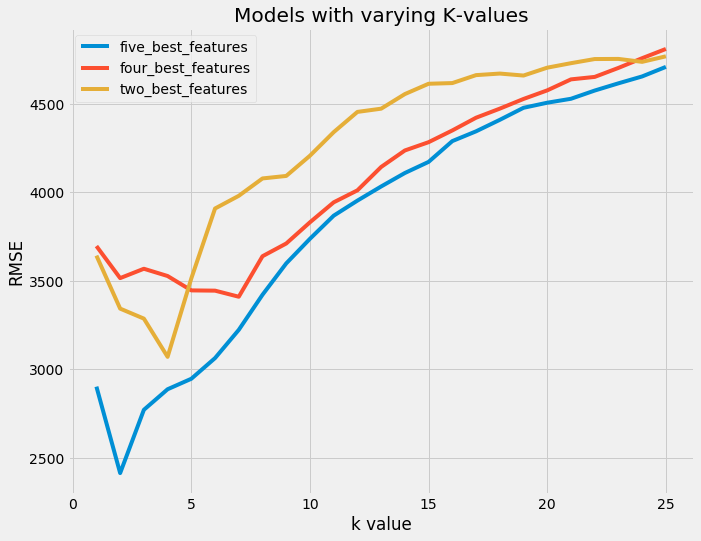

In [39]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
for k, rmse in diffk_best_features_rmse.items():
    x = list(rmse.keys())
    y = list(rmse.values())
    
    plt.plot(x,y, label=k)
    plt.xlabel("k value")
    plt.ylabel("RMSE")
plt.title("Models with varying K-values")   
plt.legend()
plt.show()

## Findings:

Five_best_features was the model with the lowest error value - 2413 with k=2. Second was two_best_features - 3286 with k=3.

Let's now make things a bit quicker using the scikit-learn library. Instead of making K fold from scratch, we can use the KFold class. This class creates an iterator object which we use in conjunction with the cross_val_score() function, also from sklearn.model_selection. Together, these 2 functions allow us to compactly train and test using k-fold cross validation. Well create a function to automate this and the n_neighbors argument of KNeighborsRegressor()

In [40]:
from sklearn.model_selection import cross_val_score, KFold


def knn_k_fold(features, target_col, df, k_values):
    """
    Arguments:
    features = features 
    target_col = target variable
    df = dataframe
    k_values = list of k-values
    
    This function will check for missing values and if
    necessary, remove them. Afterwards the models are built, varying
    the k-values, to then cross validate and record the RMSE's. It
    then takes the average and returns that value as the output. 
    
    """
    # drop rows with missing values
    if df.isnull().values.any():
        df = df.dropna()
    else:
        pass
    #training
    avg_errors = {}
    for k in k_values:
        # instantiate KFold object
        kf = KFold(n_splits=5, shuffle=True, random_state=0)
        # instantiate model with varying k
        knn = KNeighborsRegressor(n_neighbors=k)
        # cross validate
        mses = cross_val_score(knn, df[features], df[target_col], scoring='neg_mean_squared_error', cv=kf)
        # average
        avg_rmse = np.mean(np.sqrt(np.absolute(mses)))
        # store in dictionary
        avg_errors[k] = avg_rmse
    
    return avg_errors

In [41]:
k = list(range(2,20))
models = [five_best_features, four_best_features, two_best_features]
rmses_final = {}
for i, model in enumerate(models):
    rmse = knn_k_fold(model, 'price', numeric_cars, k)
    rmses_final[i] = rmse

rmses_final

{0: {2: 2699.0465151755225,
  3: 2830.7720937680083,
  4: 2972.088618812905,
  5: 3009.772144155123,
  6: 3227.0771052422197,
  7: 3304.063247157258,
  8: 3358.1536242175025,
  9: 3458.9102758826384,
  10: 3526.4048650124664,
  11: 3606.217447094567,
  12: 3703.7129627916206,
  13: 3790.6649755829044,
  14: 3871.99819552137,
  15: 3953.1852156333457,
  16: 3995.422998017435,
  17: 4044.370564036709,
  18: 4084.369820778611,
  19: 4137.5323745738},
 1: {2: 3307.079517299874,
  3: 3557.675680870484,
  4: 3625.2025203228504,
  5: 3591.1388315974386,
  6: 3702.5099514666554,
  7: 3757.9788550765843,
  8: 3815.5245321076663,
  9: 3786.861272328721,
  10: 3785.7743695886456,
  11: 3748.345436160865,
  12: 3801.5683905925,
  13: 3823.040112843457,
  14: 3926.5758694282836,
  15: 3998.455896739341,
  16: 4072.8577171531383,
  17: 4153.845575757426,
  18: 4193.885433041926,
  19: 4257.290191944492},
 2: {2: 3660.8594571620138,
  3: 3390.178709126584,
  4: 3488.0027967332703,
  5: 3567.877502665

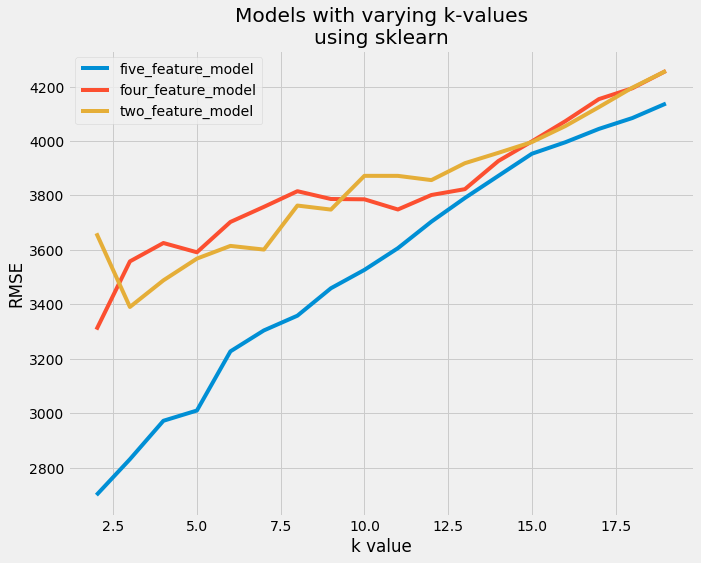

In [42]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
for k, rmse in rmses_final.items():
    x = list(rmse.keys())
    y = list(rmse.values())
    
    plt.plot(x,y, label=k)
    plt.xlabel("k value")
    plt.ylabel("RMSE")

handles = ["five_feature_model",
          "four_feature_model",
          "two_feature_model"]
plt.title("Models with varying k-values\nusing sklearn")
plt.legend(labels=handles)
plt.show()

## Findings:

The best model was the five_feature_model with the optimal neighbors k=2 and an error value of 2699. Building the model from scratch gave similar results to the scikit learn library. 

## Conclusion:

In this notebook we have covered data cleaning, feature scaling, cross validation, hyperparameter tuning, and the creation of functions to quickly iterate through different models.